## Research Question
*A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to create a solution that would allow her to determine whether ads targeted to audiences of certain characteristics i.e. city, male country, ad topic, etc. would click on her ads. Ceate a prediction model that more accurately predicts whether a user will click an Ad.*

## Metrics of success
*The accuracy score of the model will be used to measure the predictive power of the model.*

In [1]:
# Importing libraries
library(tidyverse)
library(magrittr)
library(corrplot)
library(caret)
library(skimr)
options(warn = -1)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract


corrplot 0.84 loaded

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift



Attaching package: 'skimr'


The following object is masked from 'package:stats':

    filter




In [2]:
# Loading the csv file
df = read_csv('advertising.csv')

# Previewing the first five rows of the dataframe
head(df)

Parsed with column specification:
cols(
  `Daily Time Spent on Site` = col_double(),
  Age = col_double(),
  `Area Income` = col_double(),
  `Daily Internet Usage` = col_double(),
  `Ad Topic Line` = col_character(),
  City = col_character(),
  Male = col_double(),
  Country = col_character(),
  Timestamp = col_datetime(format = ""),
  `Clicked on Ad` = col_double()
)



Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [3]:
# Checking the class type of the loaded file
class(df)

# Changing loaded file to dataframe
df = as.data.frame(df)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [4]:
# Taking a glimpse on some of the data in the dataframe
glimpse(df)

Observations: 1,000
Variables: 10
$ `Daily Time Spent on Site` <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99...
$ Age                        <dbl> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, ...
$ `Area Income`              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, ...
$ `Daily Internet Usage`     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, ...
$ `Ad Topic Line`            <chr> "Cloned 5thgeneration orchestration", "M...
$ City                       <chr> "Wrightburgh", "West Jodi", "Davidton", ...
$ Male                       <dbl> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0...
$ Country                    <chr> "Tunisia", "Nauru", "San Marino", "Italy...
$ Timestamp                  <dttm> 2016-03-27 00:53:11, 2016-04-04 01:39:0...
$ `Clicked on Ad`            <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0...


In [5]:
# Checking some statistical summaries of the data
summary(df)

 Daily Time Spent on Site      Age         Area Income    Daily Internet Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad Topic Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

In [6]:
# Checking for the dimensions of the dataframe
dim(df)

[1] 1000   10

*The dataset has 1000 observations with a rank of 10*

In [7]:
str(df)

'data.frame':	1000 obs. of  10 variables:
 $ Daily Time Spent on Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : num  35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num  256 194 236 246 226 ...
 $ Ad Topic Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : num  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : POSIXct, format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ Clicked on Ad           : num  0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   `Daily Time Spent on Site` = col_double(),
  ..   Age = col_double(),
  ..   `Area Income` = col_do

In [8]:
# Changing column names to lower and replacing spaces with an underscore for readability and easy reference
colnames(df) = tolower(str_replace_all(colnames(df), c(' ' = '_')))

# Checking whether the column names have been renames appriopriately
print(colnames(df))

 [1] "daily_time_spent_on_site" "age"                     
 [3] "area_income"              "daily_internet_usage"    
 [5] "ad_topic_line"            "city"                    
 [7] "male"                     "country"                 
 [9] "timestamp"                "clicked_on_ad"           


*There are ten variables/ features in the dataset*

In [9]:
# The male column should be renamed to gender
colnames(df)[colnames(df) == 'male'] = 'gender'

In [10]:
# Checking the datatypes for each column
columns = colnames(df)
for (column in seq(length(colnames(df)))){
    print(columns[column])
    print(class(df[, column]))
    cat('\n')
}

[1] "daily_time_spent_on_site"
[1] "numeric"

[1] "age"
[1] "numeric"

[1] "area_income"
[1] "numeric"

[1] "daily_internet_usage"
[1] "numeric"

[1] "ad_topic_line"
[1] "character"

[1] "city"
[1] "character"

[1] "gender"
[1] "numeric"

[1] "country"
[1] "character"

[1] "timestamp"
[1] "POSIXct" "POSIXt" 

[1] "clicked_on_ad"
[1] "numeric"



In [11]:
# Changing column names to their appriopriate data type
# Creating a lists of categorical and numerical columns 

# List of categorical columns
cat_cols = c("ad_topic_line", "city", "gender", "country", "clicked_on_ad" )

# List of numerical columns
num_cols = c("daily_time_spent_on_site", "age", "area_income", "daily_internet_usage")

# Changing columns to factors
df[,cat_cols] %<>% lapply(function(x) as.factor(as.character(x)))

In [12]:
# Checking whether the datatypes for each column have been changed apprippriately
columns = colnames(df)
for (column in seq(length(colnames(df)))){
    print(columns[column])
    print(class(df[, column]))
    print(nlevels(df[, column]))
    cat('\n')
}

[1] "daily_time_spent_on_site"
[1] "numeric"
[1] 0

[1] "age"
[1] "numeric"
[1] 0

[1] "area_income"
[1] "numeric"
[1] 0

[1] "daily_internet_usage"
[1] "numeric"
[1] 0

[1] "ad_topic_line"
[1] "factor"
[1] 1000

[1] "city"
[1] "factor"
[1] 969

[1] "gender"
[1] "factor"
[1] 2

[1] "country"
[1] "factor"
[1] 237

[1] "timestamp"
[1] "POSIXct" "POSIXt" 
[1] 0

[1] "clicked_on_ad"
[1] "factor"
[1] 2



*Inferences that can be drawn from the above summary:*
 - *There are 969 unique cities in the dataset.*
 - *There are 237 inique counties in the dataset*
 - *All the values in the ___ad_topic_line___ variable are unique, therefore they wont add new information when modelling*

In [13]:
# Checking for missing values
colSums(is.na(df))

daily_time_spent_on_site                      age              area_income 
                       0                        0                        0 
    daily_internet_usage            ad_topic_line                     city 
                       0                        0                        0 
                  gender                  country                timestamp 
                       0                        0                        0 
           clicked_on_ad 
                       0

*There are no missing values in the dataset*

In [14]:
# Checking for duplicates
anyDuplicated(df)

[1] 0

*There is no duplicated data in the dataset*

In [15]:
# Frequency tables
table(df$gender)


  0   1 
519 481 

*The gender variable is fairly balanced, with females slightly more than the males*

In [16]:
table(df$clicked_on_ad)


  0   1 
500 500 

*The dataset is well balanced with a ratio of ___1:1___*

In [17]:
# Renaming the target variable to appriopriate R names
levels(df$clicked_on_ad) <- c("Yes", "No")

### Univariate analysis

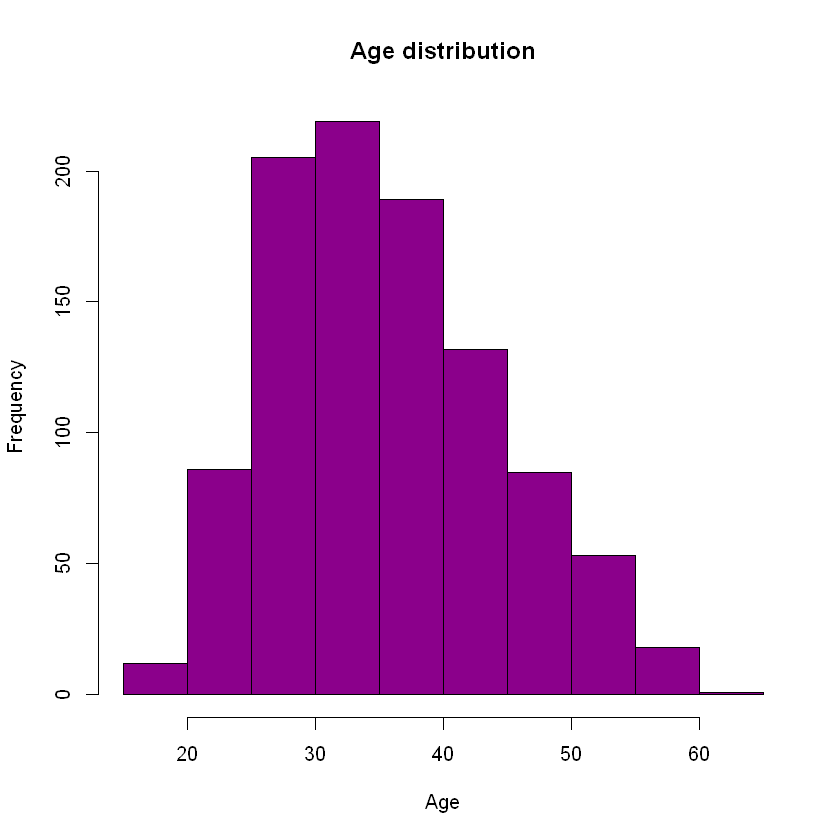

In [18]:
# Plotting a histogram to check for the distribution of the age
hist(df$age, col = 'darkmagenta',
    main = 'Age distribution',
    xlab = 'Age',
    ylab = 'Frequency')

*Inferences drawn from the above plot include;*
 - *The minimum age in the dataset is 5*
 - *The maximum age is more than 60*
 - *The age distribution is skewed to the right*
 - *Majority of individuals in the dataset are between the ages of 30 and 35*

## Bivariate analysis

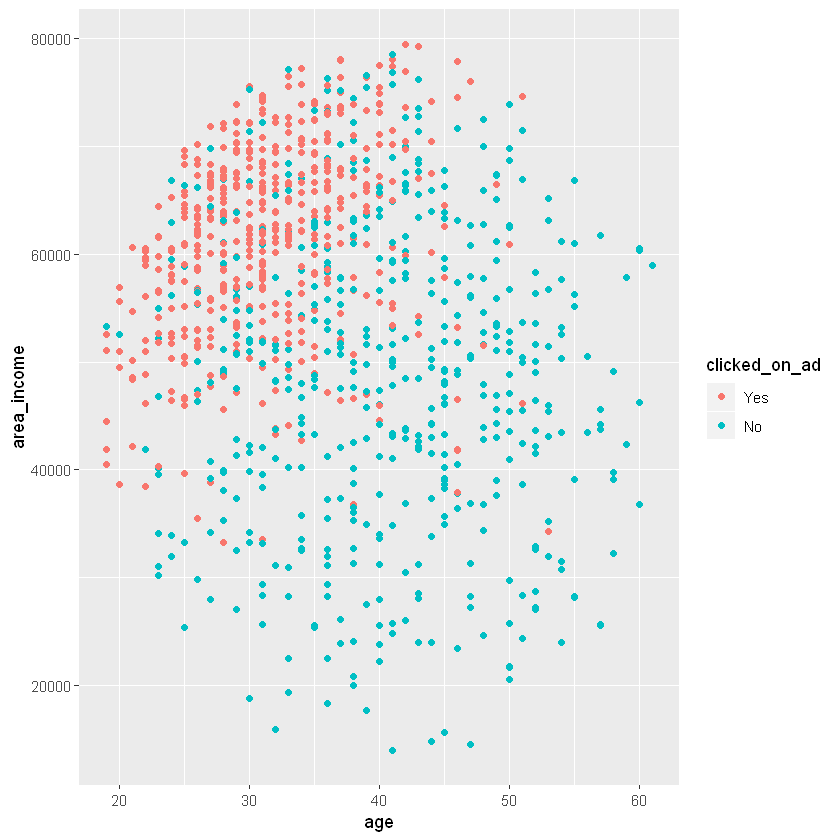

In [19]:
ggplot(data = df, aes(x = age, y = area_income, col = clicked_on_ad)) + 
    geom_point()

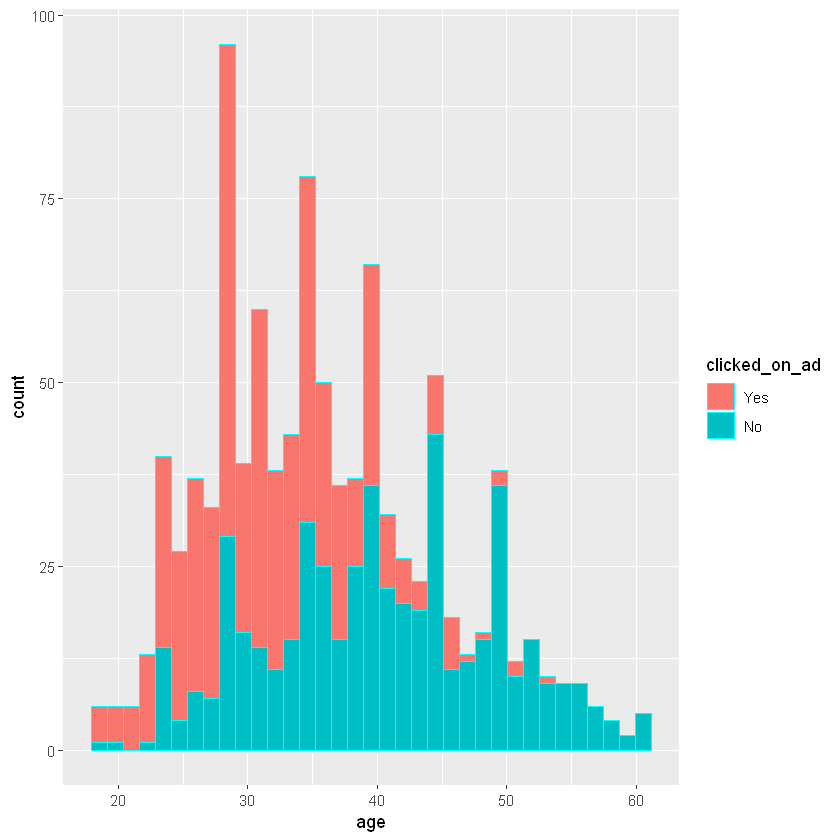

In [20]:
ggplot(data = df, aes(x = age, fill = clicked_on_ad))+
    geom_histogram(bins = 35, color = 'cyan')

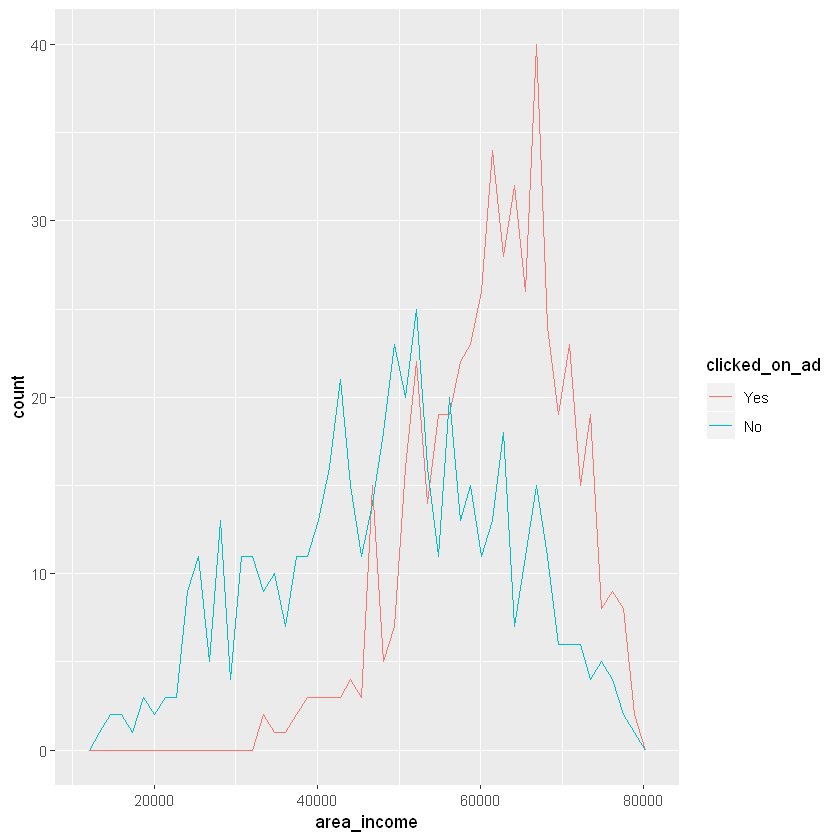

In [21]:
# Frequency polygon
ggplot(data = df, aes(x = area_income, col = clicked_on_ad))+
    geom_freqpoly(bins = 50)

In [22]:
# Splitting the data into training and testing sets
# Setting the seed to 100, for reproducibility
set.seed(100)

# Selecting only columns that are relevant to modeling
mod_cols = c('daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage', 'gender', 'clicked_on_ad')
df = select(df, mod_cols)

# Splitting the data into 80% training and 20% testing
train_rows = createDataPartition(df$clicked_on_ad, p=0.8, list=FALSE)

# Creating the training  dataset
train = df[train_rows,]

# Creating the test dataset
test = df[-train_rows,]

# Creating the  X and Y variables
x = train
y = train$clicked_on_ad

In [23]:
# Training the model
model = train(clicked_on_ad ~ ., data = train, method = 'earth')

# Making predictions using the training set
pred = predict(model)

Loading required package: earth

Loading required package: Formula

Loading required package: plotmo

Loading required package: plotrix

Loading required package: TeachingDemos



In [24]:
# Displaying the parameters and their values in the model
model

Multivariate Adaptive Regression Spline 

800 samples
  5 predictor
  2 classes: 'Yes', 'No' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 800, 800, 800, 800, 800, 800, ... 
Resampling results across tuning parameters:

  nprune  Accuracy   Kappa    
   2      0.9016503  0.8031409
   6      0.9634582  0.9268097
  11      0.9614716  0.9228648

Tuning parameter 'degree' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were nprune = 6 and degree = 1.

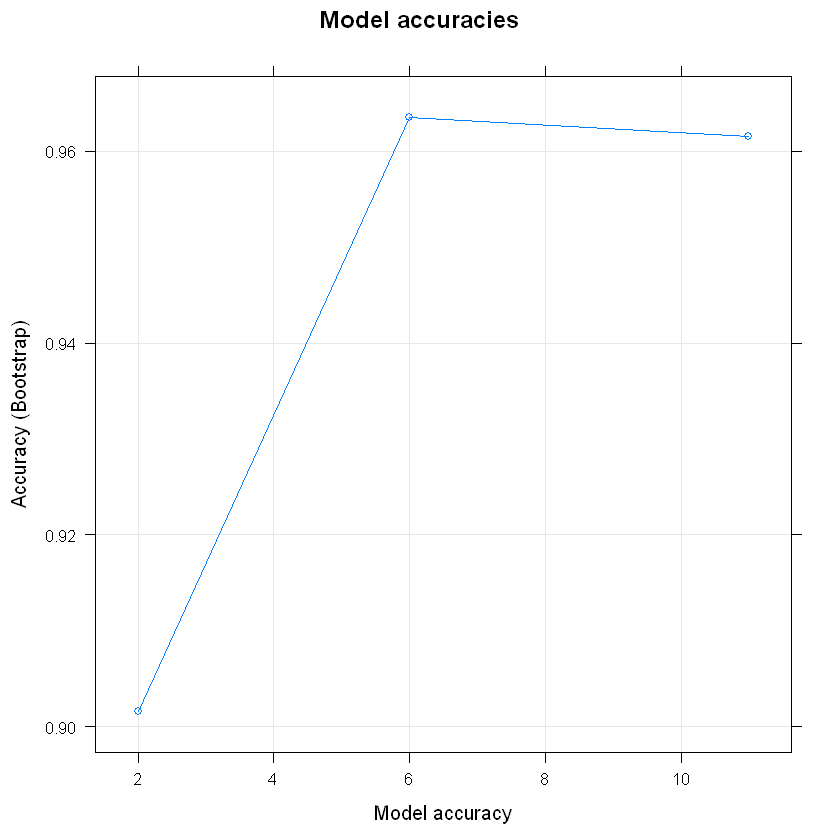

In [25]:
# Plotting the model to show various iterations of the hyperparameters 
plot(model, main = 'Model accuracies', xlab = 'Model accuracy')

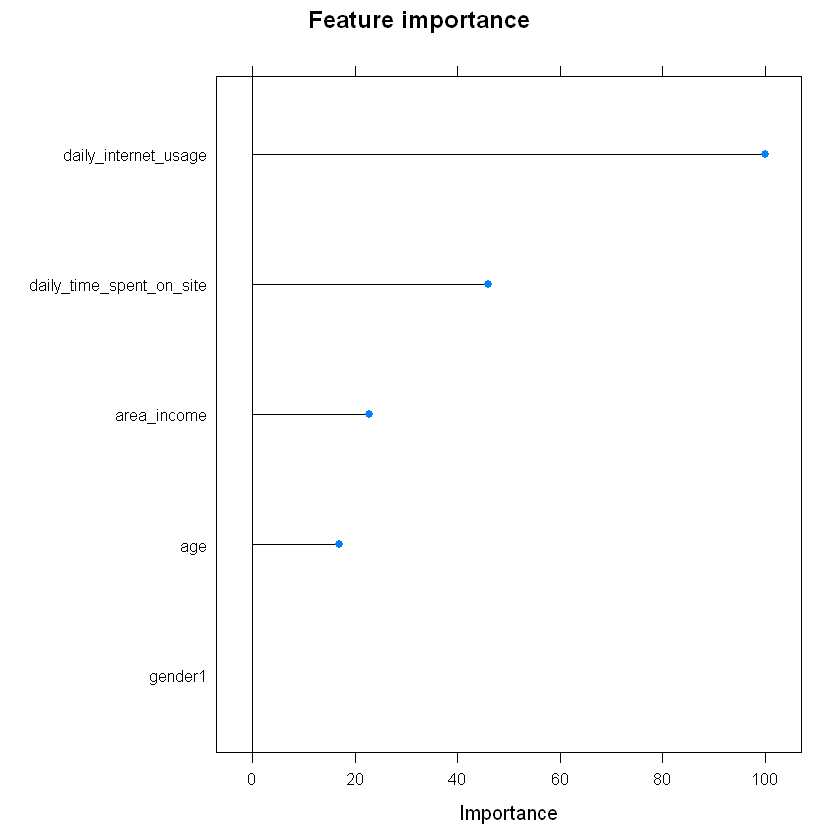

In [26]:
# Checking which features were important in predicting the target variable
important_features = varImp(model)

# Plotting feature importance
plot(important_features, main = 'Feature importance')

*Features that are important in predicting the target in rank of importance;*
 1. Daily internet use
 2. Daily time spent on site
 3. Area income
 4. Age
 5. Gender

In [27]:
# Previewing the first five predictions
y_pred = predict(model, test)
head(y_pred)

[1] Yes Yes No  Yes No  No 
Levels: Yes No

### Confusion Matrix

In [28]:
# Displaying the confusion matrix
confusionMatrix(reference = test$clicked_on_ad, data = y_pred, mode='everything', positive = 'Yes')

Confusion Matrix and Statistics

          Reference
Prediction Yes No
       Yes  98  3
       No    2 97
                                          
               Accuracy : 0.975           
                 95% CI : (0.9426, 0.9918)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9800          
            Specificity : 0.9700          
         Pos Pred Value : 0.9703          
         Neg Pred Value : 0.9798          
              Precision : 0.9703          
                 Recall : 0.9800          
                     F1 : 0.9751          
             Prevalence : 0.5000          
         Detection Rate : 0.4900          
   Detection Prevalence : 0.5050          
      Balanced Accuracy : 0.9750 

In [29]:
# Defining the training control
fitControl <- trainControl(
    method = 'cv',                   # k-fold cross validation
    number = 5,                      # number of folds
    savePredictions = 'final',       # saves predictions for optimal tuning parameter
    classProbs = T,                  # should class probabilities be returned
    summaryFunction=twoClassSummary  # results summary function
) 

# Tuning the hyper parameters by setting tuneLength
set.seed(100)
model_2 = train(clicked_on_ad ~ ., data=train, method='earth', tuneLength = 5, metric='accuracy', trControl = fitControl)
model_2

# Step 2: Predict on testData and Compute the confusion matrix
y_pred_2 <- predict(model_2, test)
confusionMatrix(reference = test$clicked_on_ad, data = y_pred_2, mode='everything', positive='Yes')

Multivariate Adaptive Regression Spline 

800 samples
  5 predictor
  2 classes: 'Yes', 'No' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results across tuning parameters:

  nprune  ROC        Sens    Spec  
   2      0.9539062  0.9100  0.8900
   4      0.9787969  0.9675  0.9300
   6      0.9869375  0.9750  0.9500
   8      0.9873125  0.9650  0.9525
  11      0.9872188  0.9700  0.9575

Tuning parameter 'degree' was held constant at a value of 1
ROC was used to select the optimal model using the largest value.
The final values used for the model were nprune = 8 and degree = 1.

Confusion Matrix and Statistics

          Reference
Prediction Yes No
       Yes  98  3
       No    2 97
                                          
               Accuracy : 0.975           
                 95% CI : (0.9426, 0.9918)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9800          
            Specificity : 0.9700          
         Pos Pred Value : 0.9703          
         Neg Pred Value : 0.9798          
              Precision : 0.9703          
                 Recall : 0.9800          
                     F1 : 0.9751          
             Prevalence : 0.5000          
         Detection Rate : 0.4900          
   Detection Prevalence : 0.5050          
      Balanced Accuracy : 0.9750 

### Hyper parameter tuning using tuneGrid

In [30]:
# Defining gthe parameters to tune
params = expand.grid(nprune = c(2, 4, 6, 8, 10), 
                        degree = c(1, 2, 3))

# Tuning hyper parameters by setting tuneGrid
set.seed(100)
model_3 = train(clicked_on_ad ~ ., data=train, method='earth', metric='accuracy', tuneGrid = params, trControl = fitControl)
model_3

# Predicting the test set and computing the confusion matrix
y_pred_3 = predict(model_3, test)
confusionMatrix(reference = test$clicked_on_ad, data = y_pred_3, mode='everything', positive='Yes')

Multivariate Adaptive Regression Spline 

800 samples
  5 predictor
  2 classes: 'Yes', 'No' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results across tuning parameters:

  degree  nprune  ROC        Sens    Spec  
  1        2      0.9539062  0.9100  0.8900
  1        4      0.9787969  0.9675  0.9300
  1        6      0.9869375  0.9750  0.9500
  1        8      0.9873125  0.9650  0.9525
  1       10      0.9870937  0.9675  0.9500
  2        2      0.9535938  0.9125  0.8900
  2        4      0.9843594  0.9600  0.9400
  2        6      0.9856875  0.9625  0.9425
  2        8      0.9860156  0.9725  0.9500
  2       10      0.9862344  0.9700  0.9525
  3        2      0.9535938  0.9125  0.8900
  3        4      0.9856250  0.9700  0.9500
  3        6      0.9876406  0.9700  0.9450
  3        8      0.9880625  0.9600  0.9525
  3       10      0.9861250  0.9725  0.9525

ROC was used to select the optimal model using t

Confusion Matrix and Statistics

          Reference
Prediction Yes No
       Yes  96  3
       No    4 97
                                          
               Accuracy : 0.965           
                 95% CI : (0.9292, 0.9858)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.93            
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9600          
            Specificity : 0.9700          
         Pos Pred Value : 0.9697          
         Neg Pred Value : 0.9604          
              Precision : 0.9697          
                 Recall : 0.9600          
                     F1 : 0.9648          
             Prevalence : 0.5000          
         Detection Rate : 0.4800          
   Detection Prevalence : 0.4950          
      Balanced Accuracy : 0.9650 

*The mode has an accuracy score of 96.5%*

## Chalenging the solution

*__The following models have been used to challenge the solution;__*
 - Adaboost
 - Random forest
 - Xgboost
 - Support vector machine

### Adaboost

In [37]:
set.seed(100)

# Training the model using adaboost
model_adaboost = train(clicked_on_ad ~ ., data=train, method='adaboost', tuneLength=2, trControl = fitControl)
model_adaboost

AdaBoost Classification Trees 

800 samples
  5 predictor
  2 classes: 'Yes', 'No' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results across tuning parameters:

  nIter  method         ROC        Sens    Spec  
   50    Adaboost.M1    0.9836875  0.9675  0.9450
   50    Real adaboost  0.8600156  0.9725  0.9450
  100    Adaboost.M1    0.9846563  0.9700  0.9475
  100    Real adaboost  0.8523594  0.9800  0.9475

ROC was used to select the optimal model using the largest value.
The final values used for the model were nIter = 100 and method = Adaboost.M1.

### Random Forest 

In [31]:
set.seed(100)

# Train the model using rf
model_rf = train(clicked_on_ad ~ ., data=train, method='rf', tuneLength=5, trControl = fitControl)
model_rf

note: only 4 unique complexity parameters in default grid. Truncating the grid to 4 .



Random Forest 

800 samples
  5 predictor
  2 classes: 'Yes', 'No' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results across tuning parameters:

  mtry  ROC        Sens    Spec  
  2     0.9894063  0.9675  0.9550
  3     0.9876563  0.9675  0.9550
  4     0.9865625  0.9625  0.9500
  5     0.9845625  0.9500  0.9525

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

### Xgboost

In [32]:
set.seed(100)

# Train the model using xgboost
model_xgbDART = train(clicked_on_ad ~ ., data=train, method='xgbDART', tuneLength=1, trControl = fitControl, verbose=F)
model_xgbDART

eXtreme Gradient Boosting 

800 samples
  5 predictor
  2 classes: 'Yes', 'No' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results across tuning parameters:

  eta  rate_drop  skip_drop  colsample_bytree  ROC        Sens    Spec  
  0.3  0.01       0.05       0.6               0.9874844  0.9675  0.9500
  0.3  0.01       0.05       0.8               0.9868125  0.9675  0.9475
  0.3  0.01       0.95       0.6               0.9871562  0.9600  0.9500
  0.3  0.01       0.95       0.8               0.9881719  0.9625  0.9550
  0.3  0.50       0.05       0.6               0.9784531  0.9350  0.9075
  0.3  0.50       0.05       0.8               0.9768594  0.9375  0.9000
  0.3  0.50       0.95       0.6               0.9877187  0.9625  0.9525
  0.3  0.50       0.95       0.8               0.9888125  0.9650  0.9475
  0.4  0.01       0.05       0.6               0.9889062  0.9725  0.9500
  0.4  0.01       0.05       0.8     

### Support Vector Machine

In [35]:
set.seed(100)

# Train the model using support vector machine
model_svmRadial = train(clicked_on_ad ~ ., data=train, method='svmRadial', tuneLength=1, trControl = fitControl)
model_svmRadial

Support Vector Machines with Radial Basis Function Kernel 

800 samples
  5 predictor
  2 classes: 'Yes', 'No' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results:

  ROC        Sens    Spec  
  0.9909062  0.9775  0.9575

Tuning parameter 'sigma' was held constant at a value of 0.2158025

Tuning parameter 'C' was held constant at a value of 0.25

### Model comparison

In [38]:
# Compare model performances using resample()
models_compare = resamples(list(ADABOOST=model_adaboost, RF=model_rf, XGBDART=model_xgbDART, MARS=model_3, SVM=model_svmRadial))

# Summary of the models performances
summary(models_compare)


Call:
summary.resamples(object = models_compare)

Models: ADABOOST, RF, XGBDART, MARS, SVM 
Number of resamples: 5 

ROC 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
ADABOOST 0.9792188 0.9840625 0.9843750 0.9846563 0.9867187 0.9889062    0
RF       0.9864063 0.9866406 0.9867187 0.9894063 0.9910156 0.9962500    0
XGBDART  0.9807813 0.9895312 0.9898438 0.9890000 0.9914063 0.9934375    0
MARS     0.9829687 0.9840625 0.9854688 0.9880625 0.9903125 0.9975000    0
SVM      0.9840625 0.9873437 0.9915625 0.9909062 0.9921875 0.9993750    0

Sens 
           Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
ADABOOST 0.9375  0.9750 0.9750 0.9700  0.9750 0.9875    0
RF       0.9250  0.9500 0.9750 0.9675  0.9875 1.0000    0
XGBDART  0.9375  0.9500 0.9500 0.9625  0.9750 1.0000    0
MARS     0.9375  0.9500 0.9625 0.9600  0.9750 0.9750    0
SVM      0.9500  0.9625 0.9750 0.9775  1.0000 1.0000    0

Spec 
           Min. 1st Qu. Median   Mean 3rd Qu.  Max. NA's
ADABOOST 0.925

### Visualising model comparison

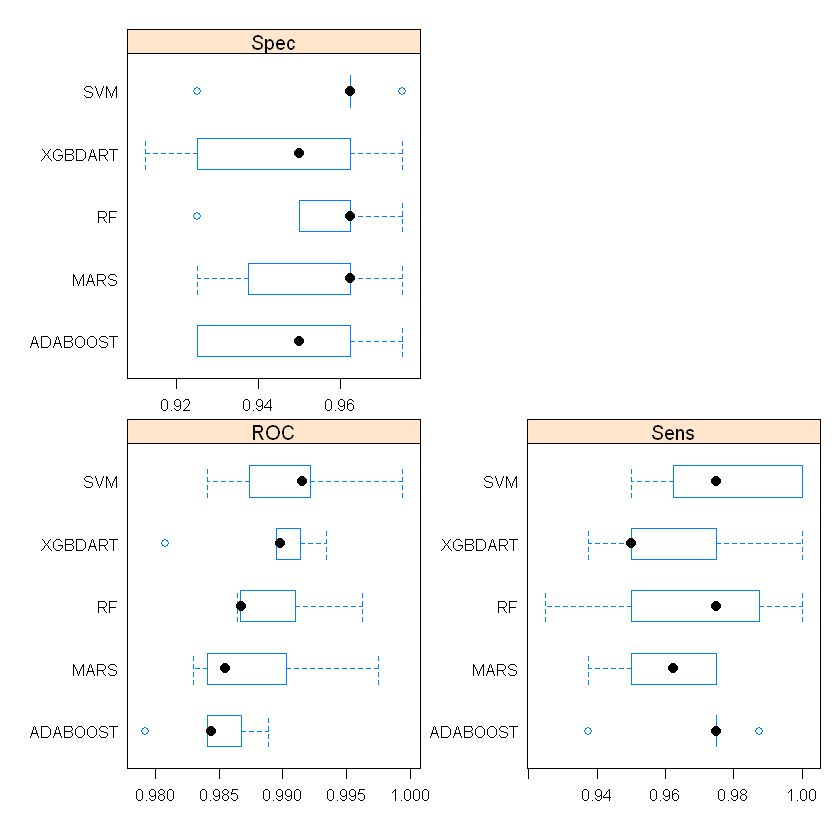

In [39]:
# Draw box plots to compare models
scales = list(x=list(relation="free"), y=list(relation="free"))
bwplot(models_compare, scales=scales)

## Conclusion

*From the above analysis and modelling the **Support Vector Machine **performs better than the other models . To increase the predictive power of the model, more data is needed*